# Kaggle Fake News Detection

Data set donwload Link   https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from nltk.corpus import stopwords

In [2]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.groupby('subject').describe()

title         \
                count unique   
subject                        
Government News  1570   1570   
Middle-east       778    778   
News             9050   9049   
US_News           783    783   
left-news        4459   4455   
politics         6841   6834   

                                                                         text  \
                                                               top freq count   
subject                                                                         
Government News  DEMOCRAT CONGRESSWOMAN: Obama Is “Working Hand...    1  1570   
Middle-east      Trump Isn’t Going to Invade Venezuela, But Wha...    1   778   
News              McConnell Says He’ll Obstruct ANY Effort To H...    2  9050   
US_News          Trump Isn’t Going to Invade Venezuela, But Wha...    1   783   
left-news        MEDIA IGNORES Time That Bill Clinton FIRED His...    3  4459   
politics         MEDIA IGNORES Time That Bill Clinton FIRED His...    3  6841   

                                                                           \
                unique                                                top   
subject                                                                     
Government News   1499                                                      
Middle-east        778  Episode #199 of SUNDAY WIRE SHOW resumes on Au...   
News              9050  Donald Trump s signature issue since he began ...   
US_News            783  Episode #199 of SUNDAY WIRE SHOW resumes on Au...   
left-news         4305                                                      
politics          6425                                                      

                      date                                 
                freq count unique                top freq  
subject                                                    
Government News   71  1570    729       Apr 14, 2015    8  
Middle-east        1   778    468  November 17, 2016    5  
News               1  9050    723  February 16, 2016   32  
US_News            1   783    472      April 7, 2017    5  
left-news        149  4459    966        Jul 8, 2016   17  
politics         406  6841   1009        Oct 9, 2016   16

In [6]:
true.groupby('subject').describe()

title                                                            \
              count unique                                                top   
subject                                                                         
politicsNews  11272  11150  Factbox: Trump fills top jobs for his administ...   
worldnews     10145   9957  Factbox: International reaction to arrest of R...   

                    text         \
             freq  count unique   
subject                           
politicsNews   14  11272  11214   
worldnews       6  10145   9989   

                                                                       date  \
                                                            top freq  count   
subject                                                                       
politicsNews  (Reuters) - Highlights for U.S. President Dona...    8  11272   
worldnews     JOHANNESBURG (Reuters) - South Africa s main o...    2  10145   

                                              
             unique                 top freq  
subject                                       
politicsNews    716   November 9, 2016   115  
worldnews       129  December 20, 2017   161

Clearly noticed that Subject is not common between both data set

In [7]:
fake.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [8]:
true.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [9]:
fake['fake'] = 1
true['fake'] = 0

In [10]:
merge = pd.merge(fake, true, how='outer')
df = merge.copy()

In [11]:
df.count()

title      44898
text       44898
subject    44898
date       44898
fake       44898
dtype: int64

In [12]:
df['lenght'] = df['title'].apply(len)

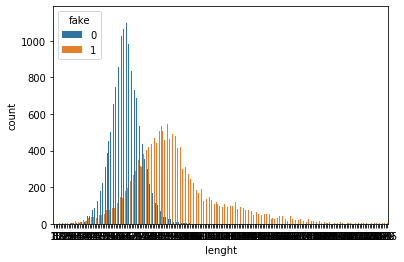

In [13]:
sns.countplot(df['lenght'], hue='fake', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12A4BC70>,
      dtype=object)

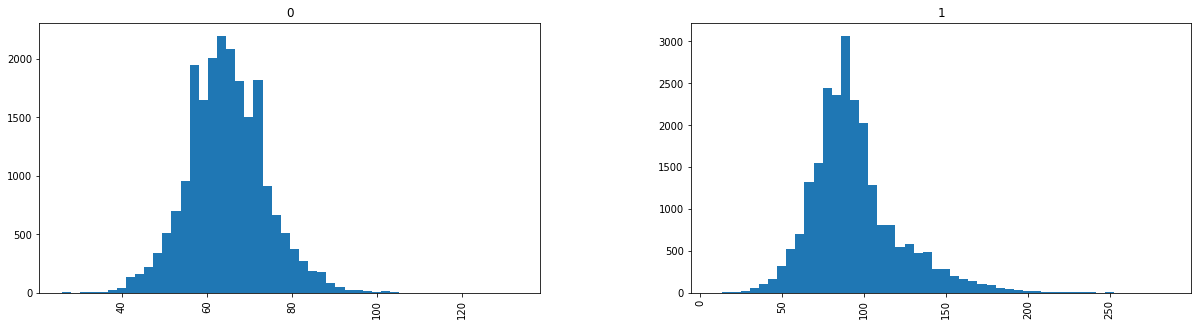

In [15]:
df.hist(column='lenght', by='fake', figsize=(20,5), bins=50)

# Lets Try with Ttitle only

Start the text processing

In [24]:
import string

def text_process(title):
    
    nop = [char for char in title if char not in string.punctuation]
    
    nop = ''.join(nop)
    
    return [word for word in nop.split() if word in word.lower() not in stopwords.words('english')]
    

## Modeling

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
pipline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['fake'], test_size=0.2, random_state=42)

In [35]:
pipline.fit(X_train, y_train)
prediction = pipline.predict(X_test)

print('Classification report', classification_report(prediction, y_test))

Classification report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4170
           1       0.99      0.97      0.98      4810

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

